In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tdt import read_block, read_sev, epoc_filter #download_demo_data

In [3]:
%config Completer.use_jedi = False

In [2]:
# this is already downloaded to /home/gergely/code/fiberPhotometry_YP/data
# download_demo_data()

In [4]:
BLOCK_PATH = '/home/gergely/code/fiberPhotometry_YP/data/VTA4-190125-100559'
data = read_block(BLOCK_PATH)
print(data)
print('===============')
print(data.info)

Found Synapse note file: /home/gergely/code/fiberPhotometry_YP/data/VTA4-190125-100559/Notes.txt
read from t=0s to t=785.44s
epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])
tankpath:	'/home/gergely/code/fiberPhotometry_YP/data'
blockname:	'VTA4-190125-100559'
start_date:	datetime.datetime(2019, 1, 25, 11, 6, 1, 999999)
utc_start_time:	'11:06:01'
stop_date:	datetime.datetime(2019, 1, 25, 11, 19, 7, 441481)
utc_stop_time:	'11:19:07'
duration:	datetime.timedelta(0, 785, 441482)
stream_channel:	0
snip_channel:	0
experiment:	'FastedSucrose1'
subject:	'VTA4'
user:	'ChrisMorrison'
start:	'10:06:02am 2019-01-25'
stop:	'10:19:08am 2019-01-25'


In [5]:
data.streams.keys()

dict_keys(['_480G', '_405G', 'Fi1r'])

In [28]:
data.epocs.keys()
# from tdt import StructType
# StructType?

dict_keys(['Ler_', 'Note'])

In [42]:
data.epocs['Ler_'].keys()

dict_keys(['name', 'onset', 'offset', 'type', 'type_str', 'data', 'dform', 'size'])

In [43]:
len(data.epocs['Ler_']['onset'])

769

In [15]:
print(data.streams._465N.fs)
print(data.streams._405N.fs)

1017.2526245117188
1017.2526245117188


In [11]:
fiberData = pd.DataFrame()
fiberData['405'] = data.streams._405N.data
fiberData['465'] = data.streams._465N.data
fiberData.head()

,405,465
0,0.758330,0.699705
1,0.746663,0.681369
2,0.732604,0.660680
3,0.716358,0.637865
4,0.698098,0.613170


In [32]:
num_samples = len(data.streams._405N.data)
print('numeber of samples: ', num_samples)
static_time = np.linspace(1, num_samples, num_samples) / data.streams._405N.fs
dynamic_time = np.linspace(1, num_samples, num_samples) / data.streams._465N.fs

numeber of samples:  622464


In [36]:
data.streams._405N.fs == data.streams._465N.fs

True

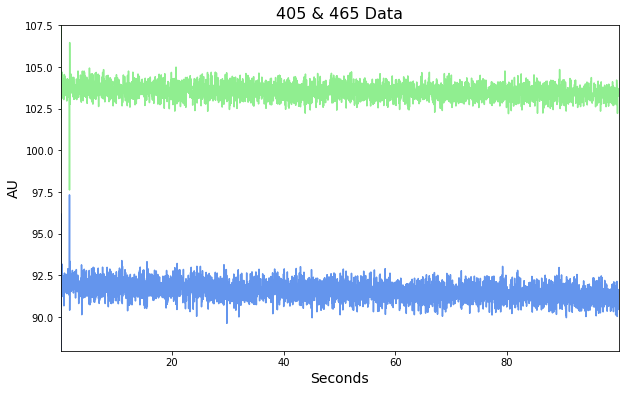

In [42]:
length = 100 #length of the data in sec you want to print
t = int(length * data.streams._405N.fs) # int rounds it to the nearest integer

# declare the figure size
fig1 = plt.figure(figsize=(10, 6))

# plot the line using slices
plt.plot(static_time[150:t], data.streams._405N.data[150:t],
         color='cornflowerblue')
plt.plot(dynamic_time[150:t], data.streams._465N.data[150:t],
         color='lightgreen')

# Some matplotlib stuff
# add an annotation mark to the figure
# plt.annotate('Point Here',
#              xy=(0.8,0.002),
#              xytext=(.88,.003),
#              arrowprops=dict(arrowstyle='->', color='k'))

# create title, axis labels, and legend
plt.title('405 & 465 Data', fontsize=16)
plt.xlabel('Seconds', fontsize=14)
plt.ylabel('AU', fontsize=14)
# plt.legend(('Channel {}'.format(channel),),
#            loc='lower right',
#            bbox_to_anchor=(1.0,1.01))
plt.autoscale(tight=True)
plt.show()

In [10]:
SAMPLE_BLOCK_PATH = '/home/gergely/code/fiberPhotometry_YP/data/Algernon-180308-130351'
sample_data = read_block(SAMPLE_BLOCK_PATH)
print(sample_data)

read from t=0s to t=61.23s
epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])


In [12]:
sample_data.streams.keys()

dict_keys(['LFP1', 'pNe1', 'Wav1'])